### [예제 7] accuracy 메서드 리턴 index_label_prediction 에서 오답 이미지 출력

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [3]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    
    # 정확도 측정함수 
    def accuracy(self, test_input_data, test_target_data):
        
        matched_list = []
        
        # index_label_prediction 저장 list
        temp_list = []
        index_label_prediction_list = []
        
        
        for index in range(len(test_input_data)):
                        
            label = int(test_target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_input_data[index] / 255.0 * 0.99) + 0.01
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                # index_label_prediction 리스트 생성
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []    # temp_list 초기화 해주지 않으면 심각한 error 발생
                
        
        accuracy_val = (len(matched_list)/(len(test_input_data)))
        
        return accuracy_val, index_label_prediction_list
    
    
    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

#### validation 비율 0.2

In [4]:
# DataGeneration class 이용하여 training data , validation data 생성
seperation_rate = 0.2  # training data 10 % 비율로 validation data 생성
target_position = 0    # 정답은 첫번째 열

try:
    data_obj = DataGeneration('MNIST', './mnist_train.csv', seperation_rate, target_position)

    (training_data, validation_data) = data_obj.generate()
    
    print("training_data.shape = ", training_data.shape)
    print("validation_data.shape = ", validation_data.shape)

except Exception as err:
    print('Exception Occur !!')
    print(str(err))

[DataGeneration]  loaded_data.shape =  (60000, 785)
[DataGeneration] unique number of original data =  0.0 , count =  5923
[DataGeneration] unique number of original data =  1.0 , count =  6742
[DataGeneration] unique number of original data =  2.0 , count =  5958
[DataGeneration] unique number of original data =  3.0 , count =  6131
[DataGeneration] unique number of original data =  4.0 , count =  5842
[DataGeneration] unique number of original data =  5.0 , count =  5421
[DataGeneration] unique number of original data =  6.0 , count =  5918
[DataGeneration] unique number of original data =  7.0 , count =  6265
[DataGeneration] unique number of original data =  8.0 , count =  5851
[DataGeneration] unique number of original data =  9.0 , count =  5949
[DataGeneration] unique number of original data =  0.0 , ratio =  9.87  %
[DataGeneration] unique number of original data =  1.0 , ratio =  11.24  %
[DataGeneration] unique number of original data =  2.0 , ratio =  9.93  %
[DataGeneration

#### 은닉층 노드 100 개 인 경우의 MNIST 오차역전파 

In [5]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 10         # epochs

# 손실함수 값을 저장할 list 생성
loss_val_list = []

# 정확도 저장 리스트
training_accuracy_list = []
validation_accuracy_list = []

# 객체 생성
nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 1000 == 0:
            print("epochs = ", i+1, ", step = ", step,  ", current loss_val = ", nn.loss_val())
            
        # 손실함수 값 저장 per step
        loss_val_list.append(nn.loss_val())    
        
    # 정확도 계산 및 저장 per epochs
    (training_accuracy, index_label_prediction_list) = nn.accuracy(training_data[:, 1:], training_data[:, 0])
    (validation_accuracy, index_label_prediction_list) = nn.accuracy(validation_data[:, 1:], validation_data[:, 0])
    
    print('\ncurrent epochs = ', i+1,' , current training accuracy = ', 100*np.round(training_accuracy,3), ' %')
    print('current epochs = ', i+1,' , current validation accuracy = ', 100*np.round(validation_accuracy,3), ' %\n')
        
    training_accuracy_list.append(training_accuracy)
    validation_accuracy_list.append(validation_accuracy)
        
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

epochs =  1 , step =  0 , current loss_val =  6.561828476123224
epochs =  1 , step =  1000 , current loss_val =  1.5230829379325017
epochs =  1 , step =  2000 , current loss_val =  1.6186929577746532
epochs =  1 , step =  3000 , current loss_val =  1.4418853930388202
epochs =  1 , step =  4000 , current loss_val =  0.8113394329796562
epochs =  1 , step =  5000 , current loss_val =  0.7901906642353481
epochs =  1 , step =  6000 , current loss_val =  0.6925599757458182
epochs =  1 , step =  7000 , current loss_val =  1.3647966082686398
epochs =  1 , step =  8000 , current loss_val =  0.7557765849851777
epochs =  1 , step =  9000 , current loss_val =  0.6242042489560111
epochs =  1 , step =  10000 , current loss_val =  3.0661312243909733
epochs =  1 , step =  11000 , current loss_val =  0.8695082923331289
epochs =  1 , step =  12000 , current loss_val =  0.6861906749141311
epochs =  1 , step =  13000 , current loss_val =  1.1233094954398986
epochs =  1 , step =  14000 , current loss_val =

epochs =  3 , step =  20000 , current loss_val =  0.8757975163863698
epochs =  3 , step =  21000 , current loss_val =  0.8711200339417784
epochs =  3 , step =  22000 , current loss_val =  0.7795910022245015
epochs =  3 , step =  23000 , current loss_val =  0.8702315416689913
epochs =  3 , step =  24000 , current loss_val =  1.114584818328898
epochs =  3 , step =  25000 , current loss_val =  0.7753966159390692
epochs =  3 , step =  26000 , current loss_val =  0.8852748540328442
epochs =  3 , step =  27000 , current loss_val =  0.7858470689517371
epochs =  3 , step =  28000 , current loss_val =  0.8495169364803896
epochs =  3 , step =  29000 , current loss_val =  0.8127272146114143
epochs =  3 , step =  30000 , current loss_val =  0.7675291304339171
epochs =  3 , step =  31000 , current loss_val =  0.7427453223009512
epochs =  3 , step =  32000 , current loss_val =  0.7728579859341485
epochs =  3 , step =  33000 , current loss_val =  0.8370975719546857
epochs =  3 , step =  34000 , curre

epochs =  5 , step =  40000 , current loss_val =  0.8931264117899189
epochs =  5 , step =  41000 , current loss_val =  0.8209207417466967
epochs =  5 , step =  42000 , current loss_val =  0.7164803310211109
epochs =  5 , step =  43000 , current loss_val =  0.9029197531873359
epochs =  5 , step =  44000 , current loss_val =  0.7777369906056603
epochs =  5 , step =  45000 , current loss_val =  0.9418726898031423
epochs =  5 , step =  46000 , current loss_val =  0.8988794739080505
epochs =  5 , step =  47000 , current loss_val =  0.8268558774351898

current epochs =  5  , current training accuracy =  97.39999999999999  %
current epochs =  5  , current validation accuracy =  96.39999999999999  %

epochs =  6 , step =  0 , current loss_val =  0.8308879082749601
epochs =  6 , step =  1000 , current loss_val =  0.7831503565309137
epochs =  6 , step =  2000 , current loss_val =  4.233041592753958
epochs =  6 , step =  3000 , current loss_val =  0.7760172813797759
epochs =  6 , step =  4000 , c

epochs =  8 , step =  10000 , current loss_val =  0.8965529926422643
epochs =  8 , step =  11000 , current loss_val =  0.8810053379038929
epochs =  8 , step =  12000 , current loss_val =  0.902076772184153
epochs =  8 , step =  13000 , current loss_val =  0.7762922022777299
epochs =  8 , step =  14000 , current loss_val =  0.9068131861054306
epochs =  8 , step =  15000 , current loss_val =  0.8895679686207558
epochs =  8 , step =  16000 , current loss_val =  0.8675508653937929
epochs =  8 , step =  17000 , current loss_val =  1.1398262995458992
epochs =  8 , step =  18000 , current loss_val =  0.8602850465087557
epochs =  8 , step =  19000 , current loss_val =  0.8361487744749225
epochs =  8 , step =  20000 , current loss_val =  0.9272810670857576
epochs =  8 , step =  21000 , current loss_val =  0.912007097069764
epochs =  8 , step =  22000 , current loss_val =  0.8911716046166771
epochs =  8 , step =  23000 , current loss_val =  0.8306582232563975
epochs =  8 , step =  24000 , curren

epochs =  10 , step =  29000 , current loss_val =  0.8681185849922433
epochs =  10 , step =  30000 , current loss_val =  0.8789931824851196
epochs =  10 , step =  31000 , current loss_val =  0.8553619765142764
epochs =  10 , step =  32000 , current loss_val =  0.8097795205889288
epochs =  10 , step =  33000 , current loss_val =  0.9985636180611336
epochs =  10 , step =  34000 , current loss_val =  0.8616798191832276
epochs =  10 , step =  35000 , current loss_val =  0.8966387089883716
epochs =  10 , step =  36000 , current loss_val =  0.8346421469246169
epochs =  10 , step =  37000 , current loss_val =  0.7855167509794566
epochs =  10 , step =  38000 , current loss_val =  0.9962395360650426
epochs =  10 , step =  39000 , current loss_val =  0.8067831341077054
epochs =  10 , step =  40000 , current loss_val =  0.9938657733492269
epochs =  10 , step =  41000 , current loss_val =  0.9118251930535552
epochs =  10 , step =  42000 , current loss_val =  0.7921544329335236
epochs =  10 , step 

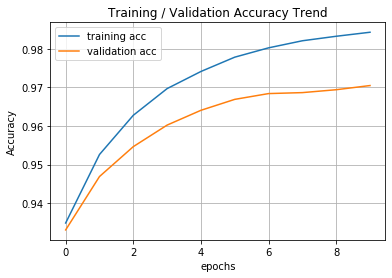

In [22]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(training_accuracy_list, label='training acc')
plt.plot(validation_accuracy_list, label='validation acc')
plt.legend(loc='best')

plt.show()

In [23]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴

try:
    
    test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32)

    test_input_data = test_data[ : , 1: ]
    test_target_data = test_data[ : , 0 ]

    print("test_data.shape = ", test_data.shape)
    print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

    # measure accuracy
    (accuracy_ret, index_label_prediction_list) = nn.accuracy(test_input_data, test_target_data)   

    print('Accuracy = ', np.round(100*accuracy_ret, 3), ' %')
    
except Exception as err:
    
    print('Exception occur !!')
    print(str(err))

test_data.shape =  (10000, 785)
test_data[0,0] =  7.0 , len(test_data[0]) =  785
Accuracy =  97.15  %


In [24]:
# 총 오답 개수
total_test_data_num = len(test_data)
false_prediction_data_num = len(index_label_prediction_list)

print('accuracy = ', (total_test_data_num - false_prediction_data_num) / total_test_data_num)
print('false prediction data num = ', false_prediction_data_num)

accuracy =  0.9715
false prediction data num =  285


In [25]:
# index_label_prediction_list 확인
print(index_label_prediction_list)

[[61, 8, 2], [149, 2, 4], [247, 4, 2], [259, 6, 0], [320, 9, 8], [321, 2, 7], [381, 3, 7], [445, 6, 0], [449, 3, 5], [495, 8, 0], [571, 4, 9], [578, 3, 7], [619, 1, 8], [659, 2, 8], [684, 7, 2], [691, 8, 4], [707, 4, 9], [720, 5, 8], [740, 4, 9], [874, 9, 4], [882, 9, 7], [938, 3, 5], [956, 1, 3], [965, 6, 0], [1003, 5, 3], [1014, 6, 5], [1039, 7, 9], [1044, 6, 8], [1107, 9, 8], [1112, 4, 6], [1114, 3, 8], [1156, 7, 8], [1166, 3, 5], [1182, 6, 8], [1204, 3, 2], [1208, 3, 8], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 5], [1260, 7, 1], [1283, 7, 2], [1289, 5, 9], [1299, 5, 7], [1319, 8, 3], [1325, 8, 6], [1326, 7, 1], [1328, 7, 8], [1348, 2, 6], [1378, 5, 6], [1393, 5, 3], [1414, 9, 7], [1494, 7, 0], [1500, 7, 1], [1522, 7, 9], [1530, 8, 7], [1549, 4, 6], [1553, 9, 3], [1554, 9, 8], [1609, 2, 6], [1621, 0, 6], [1626, 6, 5], [1678, 2, 0], [1681, 3, 7], [1709, 9, 3], [1717, 8, 0], [1751, 4, 2], [1754, 7, 2], [1790, 2, 7], [1868, 1, 2], [1901, 9, 4], [1938, 4, 6], [1941, 7, 2], [1

#### index_label_prediction_list 이미지 확인

len of index_label_prediction_list =>  285 , false_data_index =>  275


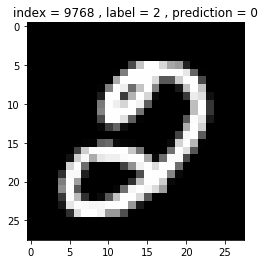

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = test_data[mnist_index, 1:].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()